# Data Wrangling
Really world data can be dirty as well as messy, i.e., it can have quality as well as structural issues. Both of these can make the analysis not just inaccurate but really hard. Hence, wrangling the data cannot be stressed enough. This project of mine is primarily focused towards wrangling the data set of WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10.  Rating numerators are greater than the denominators.This unique rating system is a big part of the popularity of WeRateDogs.

In [1]:
#Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import os
import re
import tweepy
import json
from timeit import default_timer as timer
from IPython.display import Image

%matplotlib inline

## Gathering

In [2]:
#Reading the file on hand into a pandas dataframe
archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#Downloading the file programmatically
url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

#Putting the file into a pandas dataframe
image_predictions = pd.read_csv('image-predictions.tsv', sep = '\t')

I was unable to get the Tweepy access due to certain exigencies. However I have included the following code for understanding purpose.

In [4]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
#consumer_key = 'HIDDEN'
#consumer_secret = 'HIDDEN'
#access_token = 'HIDDEN'
#access_secret = 'HIDDEN'

#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True)

#tweet_ids = archive.tweet_id.values
#len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    #for tweet_id in tweet_ids:
        #count += 1
        #print(str(count) + ": " + str(tweet_id))
        #try:
            #tweet = api.get_status(tweet_id, tweet_mode='extended')
            #print("Success")
            #json.dump(tweet._json, outfile)
            #outfile.write('\n')
        #except tweepy.TweepError as e:
            #print("Fail")
            #fails_dict[tweet_id] = e
            #pass
#end = timer()
#print(end - start)
#print(fails_dict)

Downloading the .txt file programmatically.

In [5]:
url = 'https://video.udacity-data.com/topher/2018/November/5bf60fda_tweet-json/tweet-json'
responses = requests.get(url)
with open('tweet-json', mode = 'wb') as f:
    f.write(responses.content)

In [6]:
tweet_json_f = 'tweet-json'

In [103]:
# Reading the contents from the .txt file (which has a JSON structure) and deriving the relevant information out of it
tweet_extra_json = []

with open(tweet_json_f, 'r') as json_f:
    # read the first line to start the loop
    line = json_f.readline()
    while line:
        value = json.loads(line)

        # extract variables from the JSON data
        tweet_id = value['id']
        retweet_count = value['retweet_count']
        favorite_count = value['favorite_count']
        
        # creating a dictionary with the above derived JSON data, then add all this into a list:
        json_values = {'tweet_id': tweet_id, 
                     'retweet_count': retweet_count, 
                     'favorite_count': favorite_count
                    }
        tweet_extra_json.append(json_values)
        line = json_f.readline()
        

# converting the dictionary list into a DataFrame
tweet_data_web = pd.DataFrame(tweet_extra_json, 
                                   columns = ['tweet_id',
                                              'retweet_count',
                                              'favorite_count'])

In [8]:
tweet_data_web.head(10)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [9]:
#saving the above file as a csv
tweet_data_web.to_csv('tweet_data_web.csv')

## Assessing

In [10]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [12]:
archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [13]:
archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1007,747600769478692864,NaN,NaN,2016-06-28 01:21:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bookstore and Seaweed. Bookstore is ti...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747600769...,10,10,Bookstore,None,None,None,None
939,753039830821511168,NaN,NaN,2016-07-13 01:34:21 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",So this just changed my life. 13/10 please enj...,NaN,NaN,NaN,https://vine.co/v/5W2Dg3XPX7a,13,10,None,None,None,None,None
1705,680836378243002368,NaN,NaN,2015-12-26 19:43:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ellie. She's secretly ferocious. 12/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680836378...,12,10,Ellie,None,None,pupper,None
1066,740699697422163968,NaN,NaN,2016-06-09 00:19:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chip. He only mowed half the yard. 8/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/740699697...,8,10,Chip,None,None,None,None
983,749395845976588288,NaN,NaN,2016-07-03 00:14:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is George. He just remembered that bees a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749395845...,10,10,George,None,None,None,None


In [14]:
#Checking for duplicate ids
sum(archive.tweet_id.duplicated())

0

In [15]:
# Checking for issues with the 'name' column:
archive.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Lucy          11
Cooper        11
Tucker        10
Lola          10
Penny         10
Bo             9
Winston        9
the            8
Sadie          8
Buddy          7
an             7
Daisy          7
Toby           7
Bailey         7
Rusty          6
Oscar          6
Jax            6
Bella          6
Jack           6
Dave           6
Scout          6
Leo            6
Koda           6
Milo           6
Stanley        6
Chester        5
            ... 
Chadrick       1
Freddery       1
Jomathan       1
Keet           1
Derby          1
Bonaparte      1
Devón          1
Mya            1
Brady          1
Craig          1
Kobe           1
Brooks         1
Covach         1
Monty          1
Rumpole        1
Furzey         1
Gustaf         1
Mairi          1
Flash          1
Bradlay        1
Margo          1
Zuzu           1
Dobby          1
Claude         1
Timmy          1
Walker         1
Bloo           1
Rodney        

In [16]:
# Checking if all the names that start from lowercase are invalid:
invalid_names = archive.name.str.contains('^[a-z]', regex = True)
archive[invalid_names].name.value_counts()

a               55
the              8
an               7
very             5
just             4
quite            4
one              4
mad              2
not              2
actually         2
getting          2
all              1
old              1
space            1
incredibly       1
this             1
life             1
unacceptable     1
infuriating      1
officially       1
such             1
my               1
his              1
by               1
light            1
Name: name, dtype: int64

In [17]:
#Checking the descriptive statistics:
archive.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

**Identified a potential problem : max value = 1776**

In [18]:
archive.groupby('rating_numerator').tweet_id.count()

rating_numerator
0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: tweet_id, dtype: int64

In [19]:
archive.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [20]:
archive.groupby('rating_denominator').tweet_id.count()

rating_denominator
0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: tweet_id, dtype: int64

**Identified a potential problem of consistency. Though 2333 entries have a denominator of 10, yet there are values as low as 0 and as high as 170.**

##### Assessing tweet_data 

In [21]:
#Let us match the tweet_ids of the tweet_data_web and archive dataframes:
tweet_data_web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [22]:
sum(tweet_data_web.tweet_id.duplicated())

0

In [23]:
#Assessing the descriptive statistics
tweet_data_web.retweet_count.describe()

count     2354.000000
mean      3164.797366
std       5284.770364
min          0.000000
25%        624.500000
50%       1473.500000
75%       3652.000000
max      79515.000000
Name: retweet_count, dtype: float64

In [24]:
#Assessing the descriptive statistics
tweet_data_web.favorite_count.describe()

count      2354.000000
mean       8080.968564
std       11814.771334
min           0.000000
25%        1415.000000
50%        3603.500000
75%       10122.250000
max      132810.000000
Name: favorite_count, dtype: float64

In [25]:
tweet_data_web.sample(10)

,tweet_id,retweet_count,favorite_count
939,752932432744185856,7798,13970
1159,723912936180330496,1374,4236
2219,668480044826800133,162,491
375,828046555563323392,3260,12923
646,793135492858580992,2893,7214
1902,674632714662858753,637,1617
1006,747594051852075008,1205,4065
585,799774291445383169,5488,0
1944,673705679337693185,439,1337
2329,666353288456101888,77,229


##### Assessing image_predictions

In [26]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [27]:
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1836,837110210464448512,https://pbs.twimg.com/media/C54DS1kXQAEU5pS.jpg,1,Siberian_husky,0.767696,True,Eskimo_dog,0.217079,True,malamute,0.011657,True
304,671518598289059840,https://pbs.twimg.com/media/CVG2l9jUYAAwg-w.jpg,1,Lakeland_terrier,0.428275,True,wire-haired_fox_terrier,0.111472,True,toy_poodle,0.105016,True
928,702684942141153280,https://pbs.twimg.com/media/CcBwOn0XEAA7bNQ.jpg,1,golden_retriever,0.514085,True,Chesapeake_Bay_retriever,0.173224,True,Brittany_spaniel,0.118384,True
1609,801115127852503040,https://pbs.twimg.com/media/Cx4h7zHUsAAqaJd.jpg,1,dalmatian,0.823356,True,English_setter,0.094602,True,bluetick,0.021953,True
1072,716791146589110272,https://pbs.twimg.com/media/CfKNvU8WsAAvI9Z.jpg,1,Pomeranian,0.468751,True,seat_belt,0.154652,False,golden_retriever,0.125017,True


In [28]:
image_predictions.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Siberian_husky                20
German_shepherd               20
Staffordshire_bullterrier     20
web_site                      19
Cardigan                      19
beagle                        18
teddy                         18
Shetland_sheepdog             18
Maltese_dog                   18
Eskimo_dog                    18
Lakeland_terrier              17
Shih-Tzu                      17
Rottweiler                    17
kuvasz                        16
Italian_greyhound             16
          

Potential problem : **As per the description of this data frame, p1 contains the breed names. "pole, nail, sandbar, swab, suit, traffic light, hotdog, cowboy_boot, teapot, cup, china_cabinet,website, seat_belt, American black bear" are not dog breeds.**

In [29]:
image_predictions.p2.unique()

array(['collie', 'miniature_pinscher', 'malinois', 'redbone', 'Rottweiler',
       'English_springer', 'mud_turtle', 'Tibetan_mastiff',
       'shopping_basket', 'komondor', 'Yorkshire_terrier',
       'English_foxhound', 'bull_mastiff', 'German_shepherd', 'Shih-Tzu',
       'Newfoundland', 'cock', 'desk', 'toy_terrier', 'toy_poodle',
       'otter', 'Chesapeake_Bay_retriever', 'Siberian_husky', 'skunk',
       'Afghan_hound', 'bloodhound', 'barracouta', 'papillon',
       'cocker_spaniel', 'chow', 'Irish_terrier', 'chain_saw', 'beagle',
       'giant_schnauzer', 'Labrador_retriever', 'Pembroke', 'Chihuahua',
       'Weimaraner', 'slug', 'Brittany_spaniel', 'standard_schnauzer',
       'teddy', 'armadillo', 'African_hunting_dog', 'vizsla', 'doormat',
       'pug', 'Italian_greyhound', 'Samoyed', 'Pomeranian',
       'miniature_poodle', 'Lakeland_terrier', 'Irish_setter', 'swab',
       'malamute', 'bath_towel', 'Border_collie', 'Leonberg', 'drake',
       'French_bulldog', 'ice_bear', 

We can see a similar problem with the 'p2' column. **Oxygen_mask, umbrella, shower_cap, bagel, bucket, soccer_ball, rule, cup, cab, jigsaw_puzzle, palace, envelope, racket, menu, sandbar** etc are not dog breeds.

In [30]:
sum(image_predictions.jpg_url.duplicated())

66

## Assessment :
The archive data frame has 2356 rows (entries) and 17 columns. The tweet_data_web dataframe has 2354 rows and 3 columns.
### Issues:
#### archive dataframe:
> Completeness : 
1. *retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp* have only 181 values.
2. *in_reply_to_status_id* and *in_reply_to_user_id* have only 78 non-null values.
3. *expanded_urls* are missing, there are 2297 values as against 2356.

> Validity:
1. In the *names* column : There are some dogs whose names are : 'a','an' and 'None'.
2. *rating_numerator* has values which go as high as 1776.

> Accuracy:
1. *timestamp* should not be an string datatype. It should be 'timestamp' datatype.


> Consistency:
1. *rating_denominator* has 23 values which are other than 10 (some are as high as 170 and some as low as 0, having 0 as the denominator is a potential problem). This makes comparison not consistent.
2.  HTML tags in the *source* column make the data look dirty.
3. As per the requirements of the project, delete retweets.


> Tidiness: A tidy dataframe should be one where : **each variable is listed as a column, each entry is a row and each observational unit forms as table.** 
1. There are four columns for the different dog types: *doggo, floofer, pupper, puppo*                
#### image predictions dataframe:
> Completeness: 
1. There are 2075 entries in this dataframe as against 2356 in archive dataframe.

> Validity :
1. As per the description of this data frame, p1 contains the breed names. "pole, nail, sandbar, swab, suit, traffic light, hotdog, cowboy_boot, teapot, cup, china_cabinet, website, seat_belt, American black bear" are not dog breeds.

> Accuracy :

> Consistency:
1. The starting alphabet of the dog breeds in p1, p2 and p3 are sometimes in uppercase and other times in lower case.

> Tidiness : 
1. This dataframe does not form a separate observational unit. It is a part of the **archive dataframe**.

#### twitter_data_web dataframe:
> Completeness 
1. There are 2356 entries in the archive dataframe while this one has 2354 entries.

> Accuracy :
1. *tweet_id* is an 'int' datatype.

> Tidiness : 
1. This dataframe does not form separate unit of measurement. It is a part of the **archive dataframe**.
                     


## Cleaning

As per the standard practice, I will first clean the Completeness issue and then I will take up tidiness issues. After doing these two, will I move towards validity, accuracy and consistency.

#### Define - Code - Test

In [31]:
# Creating a copy of each dataframe. All the cleaning operations will be performed on the respective copies.
archive_copy = archive.copy()
image_predictions_copy = image_predictions.copy()
tweet_data_web_copy = tweet_data_web.copy()

### Completeness
#### Cleaning Issue 1:
##### Define : Drop retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp which have only 181 values.
##### Code:

In [32]:
archive_copy.drop(['retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1, inplace = True)

##### Test:

In [33]:
list(archive_copy)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

#### Cleaning Issue 2:
##### Define : Drop in_reply_to_status_id and in_reply_to_user_id which have only 78 values using *drop* function of pandas.
##### Code:

In [34]:
archive_copy.drop(['in_reply_to_status_id','in_reply_to_user_id'], axis = 1, inplace = True)

##### Test:

In [35]:
list(archive_copy)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

#### Cleaning Issue 3:
##### Define : Drop the rows which have null "expanded_urls" (as these can't be obtained).
##### Code:

In [36]:
sum(archive_copy.expanded_urls.isnull())

59

In [37]:
archive_copy = archive_copy[archive_copy.expanded_urls.notnull()]

##### Test:

In [38]:
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2297 non-null int64
timestamp             2297 non-null object
source                2297 non-null object
text                  2297 non-null object
expanded_urls         2297 non-null object
rating_numerator      2297 non-null int64
rating_denominator    2297 non-null int64
name                  2297 non-null object
doggo                 2297 non-null object
floofer               2297 non-null object
pupper                2297 non-null object
puppo                 2297 non-null object
dtypes: int64(3), object(9)
memory usage: 233.3+ KB


### Tidiness:
#### Cleaning Issue 4:
##### Define : Melt the four columns for the different dog types: *doggo, floofer, pupper, puppo*  into one. This will be done in two stages.
1. melt the above four columns of the dataframe by creating an "intermediate" column.
2. Drop the "intermediate" column and the duplicate values by keeping the first ones.
##### Code:

In [39]:
#Code 4.1.a:
list(archive_copy)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [40]:
#Code 4.1.b:
archive_copy = pd.melt(archive_copy, id_vars = ['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name'], var_name = 'dog', value_name = 'dog_stage')

In [41]:
#Intermediate testing:
archive_copy.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,doggo,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,doggo,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,doggo,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,doggo,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,doggo,None


In [42]:
archive_copy.dog_stage.value_counts()

None       8800
pupper      255
doggo        94
puppo        29
floofer      10
Name: dog_stage, dtype: int64

In [43]:
#Intermediate testing
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9188 entries, 0 to 9187
Data columns (total 10 columns):
tweet_id              9188 non-null int64
timestamp             9188 non-null object
source                9188 non-null object
text                  9188 non-null object
expanded_urls         9188 non-null object
rating_numerator      9188 non-null int64
rating_denominator    9188 non-null int64
name                  9188 non-null object
dog                   9188 non-null object
dog_stage             9188 non-null object
dtypes: int64(3), object(7)
memory usage: 717.9+ KB


In [44]:
# Code 4.2:
#Drop the last 'intermediate' column
archive_copy.drop('dog', axis = 1, inplace = True)


In [45]:
#Sort values by dog stages and then Drop the duplicates:
archive_copy = archive_copy.sort_values('dog_stage').drop_duplicates(subset = 'tweet_id', keep = 'last').reset_index()

##### Test:

In [46]:
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2297 entries, 0 to 2296
Data columns (total 10 columns):
index                 2297 non-null int64
tweet_id              2297 non-null int64
timestamp             2297 non-null object
source                2297 non-null object
text                  2297 non-null object
expanded_urls         2297 non-null object
rating_numerator      2297 non-null int64
rating_denominator    2297 non-null int64
name                  2297 non-null object
dog_stage             2297 non-null object
dtypes: int64(4), object(6)
memory usage: 179.5+ KB


In [47]:
archive_copy.head()

,index,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,2203,667549055577362432,2015-11-20 03:44:31 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Never seen dog like this. Breathes heavy. Tilt...,https://twitter.com/dog_rates/status/667549055...,1,10,None,None
1,2204,667546741521195010,2015-11-20 03:35:20 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Here is George. George took a selfie of his ne...,https://twitter.com/dog_rates/status/667546741...,9,10,George,None
2,2205,667544320556335104,2015-11-20 03:25:43 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","This is Kial. Kial is either wearing a cape, w...",https://twitter.com/dog_rates/status/667544320...,10,10,Kial,None
3,2206,667538891197542400,2015-11-20 03:04:08 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is a southwest Coriander named Klint. Hat...,https://twitter.com/dog_rates/status/667538891...,9,10,a,None
4,2207,667534815156183040,2015-11-20 02:47:56 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","This is Frank (pronounced ""Fronq""). Too many b...",https://twitter.com/dog_rates/status/667534815...,8,10,Frank,None


In [48]:
archive_copy.dog_stage.value_counts()

None       1923
pupper      255
doggo        80
puppo        29
floofer      10
Name: dog_stage, dtype: int64

### Tidiness:
#### Cleaning Issue 5:
##### Define : Merge the three columns into a single dataframe. This will be done in two stages:
1. left merge of archive_copy and tweet_data_web_copy dataframes.
2. inner merge of archive_copy and image_predictions dataframes.
##### Code:

In [49]:
archive_copy = pd.merge(archive_copy, tweet_data_web_copy, 
                         on = 'tweet_id', how = 'left')

In [50]:
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2296
Data columns (total 12 columns):
index                 2297 non-null int64
tweet_id              2297 non-null int64
timestamp             2297 non-null object
source                2297 non-null object
text                  2297 non-null object
expanded_urls         2297 non-null object
rating_numerator      2297 non-null int64
rating_denominator    2297 non-null int64
name                  2297 non-null object
dog_stage             2297 non-null object
retweet_count         2295 non-null float64
favorite_count        2295 non-null float64
dtypes: float64(2), int64(4), object(6)
memory usage: 233.3+ KB


In [51]:
archive_copy.head()

,index,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
0,2203,667549055577362432,2015-11-20 03:44:31 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Never seen dog like this. Breathes heavy. Tilt...,https://twitter.com/dog_rates/status/667549055...,1,10,None,None,2454.0,6138.0
1,2204,667546741521195010,2015-11-20 03:35:20 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Here is George. George took a selfie of his ne...,https://twitter.com/dog_rates/status/667546741...,9,10,George,None,138.0,355.0
2,2205,667544320556335104,2015-11-20 03:25:43 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","This is Kial. Kial is either wearing a cape, w...",https://twitter.com/dog_rates/status/667544320...,10,10,Kial,None,568.0,917.0
3,2206,667538891197542400,2015-11-20 03:04:08 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is a southwest Coriander named Klint. Hat...,https://twitter.com/dog_rates/status/667538891...,9,10,a,None,72.0,220.0
4,2207,667534815156183040,2015-11-20 02:47:56 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","This is Frank (pronounced ""Fronq""). Too many b...",https://twitter.com/dog_rates/status/667534815...,8,10,Frank,None,576.0,866.0


In [52]:
archive_copy = pd.merge(archive_copy, image_predictions, on = 'tweet_id', how = 'inner')

In [53]:
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 23 columns):
index                 2075 non-null int64
tweet_id              2075 non-null int64
timestamp             2075 non-null object
source                2075 non-null object
text                  2075 non-null object
expanded_urls         2075 non-null object
rating_numerator      2075 non-null int64
rating_denominator    2075 non-null int64
name                  2075 non-null object
dog_stage             2075 non-null object
retweet_count         2073 non-null float64
favorite_count        2073 non-null float64
jpg_url               2075 non-null object
img_num               2075 non-null int64
p1                    2075 non-null object
p1_conf               2075 non-null float64
p1_dog                2075 non-null bool
p2                    2075 non-null object
p2_conf               2075 non-null float64
p2_dog                2075 non-null bool
p3                    2075 non-null ob

In [54]:
# Cleaning it by dropping the null columns in retweet_count and favorite_counts.
archive_copy = archive_copy[~(archive_copy.retweet_count.isna() | archive_copy.favorite_count.isna())]

##### Test

In [55]:
archive_copy.head()

,index,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,2203,667549055577362432,2015-11-20 03:44:31 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Never seen dog like this. Breathes heavy. Tilt...,https://twitter.com/dog_rates/status/667549055...,1,10,None,None,...,1,electric_fan,0.984377,False,spotlight,0.007737,False,lampshade,0.001901,False
1,2204,667546741521195010,2015-11-20 03:35:20 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Here is George. George took a selfie of his ne...,https://twitter.com/dog_rates/status/667546741...,9,10,George,None,...,1,toy_poodle,0.787424,True,miniature_poodle,0.202225,True,teddy,0.004047,False
2,2205,667544320556335104,2015-11-20 03:25:43 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","This is Kial. Kial is either wearing a cape, w...",https://twitter.com/dog_rates/status/667544320...,10,10,Kial,None,...,1,Pomeranian,0.412893,True,Pembroke,0.312958,True,Chihuahua,0.071960,True
3,2206,667538891197542400,2015-11-20 03:04:08 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is a southwest Coriander named Klint. Hat...,https://twitter.com/dog_rates/status/667538891...,9,10,a,None,...,1,Yorkshire_terrier,0.618957,True,silky_terrier,0.300313,True,Australian_terrier,0.053412,True
4,2207,667534815156183040,2015-11-20 02:47:56 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","This is Frank (pronounced ""Fronq""). Too many b...",https://twitter.com/dog_rates/status/667534815...,8,10,Frank,None,...,1,Pembroke,0.435254,True,Cardigan,0.307407,True,cocker_spaniel,0.033158,True


### Validity:
#### Cleaning Issue 6:
##### Define : In the *names* column : There are some dogs whose names are : 'a','an' ,'by' etc. All names starting with smaller case must be checked and invalid names isolated. Replace these invalid names with "None".
##### Code:

In [56]:
archive_copy.loc[invalid_names, 'name'] = "None"

##### Test:

In [57]:
archive_copy.name.value_counts()

None            627
a                53
Charlie          11
Penny            10
Oliver           10
Lucy             10
Cooper            9
Lola              8
Tucker            8
Winston           8
Sadie             8
Bo                8
an                7
Toby              7
Daisy             7
Rusty             6
Bailey            6
the               6
Jax               6
Koda              6
Dave              6
Scout             6
Stanley           6
Oscar             5
Leo               5
Alfie             5
Chester           5
Milo              5
Larry             5
Bella             5
               ... 
Erik              1
Obi               1
Edd               1
Dudley            1
Godzilla          1
Hall              1
Lilli             1
Lili              1
Luther            1
Ralf              1
Akumi             1
Tonks             1
Bruno             1
Bloop             1
Barney            1
Bruiser           1
Chef              1
Sandra            1
Millie            1


### Validity:
#### Cleaning Issue 7:
##### Define : 
Convert rating_numerator and rating_denominator into float data type.
##### Code:

In [58]:
#Converting rating_numerator into float type
archive_copy['rating_numerator'] = archive_copy['rating_numerator'].astype('float64')

In [59]:
#Converting rating_denominator into float type
archive_copy['rating_denominator'] = archive_copy['rating_denominator'].astype('float64')

##### Testing

In [60]:
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2074
Data columns (total 23 columns):
index                 2073 non-null int64
tweet_id              2073 non-null int64
timestamp             2073 non-null object
source                2073 non-null object
text                  2073 non-null object
expanded_urls         2073 non-null object
rating_numerator      2073 non-null float64
rating_denominator    2073 non-null float64
name                  2073 non-null object
dog_stage             2073 non-null object
retweet_count         2073 non-null float64
favorite_count        2073 non-null float64
jpg_url               2073 non-null object
img_num               2073 non-null int64
p1                    2073 non-null object
p1_conf               2073 non-null float64
p1_dog                2073 non-null bool
p2                    2073 non-null object
p2_conf               2073 non-null float64
p2_dog                2073 non-null bool
p3                    2073 non-nul

In [61]:
# Let us also check if there were any ratings with a float (i.e. it had decimal values) numerator.
# For loop to gather all text, indices, and ratings for tweets that contain a decimal in the numerator of the rating
#1. Create an empty list of texts, index and values.


float_text = []
float_index = []
float_values = []

#2. Using for loop search for decimal values in the text.
for i, text in archive_copy['text'].iteritems():
    if bool(re.search('\d+\.\d+\/\d+', text)): #3. then if the above is found to be True, appending the text, index and decimal rating to the lists mentioned in Step 1
        float_text.append(text)
        float_index.append(i)
        float_values.append(re.search('\d+\.\d+', text).group())

In [62]:
# Check if there is any such text.
float_text

['This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948',
 'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD',
 "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",
 "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq"]

**Wrangling the data is an iterative process. This find was missed out in the assessment section. So let us loop through the process again.**

In [63]:
#Check the ratings numerator for these values :
float_index

[210, 945, 1670, 2025]

In [64]:
#Printing the rows with the above indicesb 
archive_copy[archive_copy.index.isin([210, 945, 1670, 2025])]

,index,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
210,44,883482846933004288,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5.0,10.0,Bella,None,...,1,golden_retriever,0.943082,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True
945,3961,680494726643068929,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26.0,10.0,None,None,...,1,kuvasz,0.438627,True,Samoyed,0.111622,True,Great_Pyrenees,0.064061,True
1670,2964,786709082849828864,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75.0,10.0,Logan,None,...,1,Pomeranian,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True
2025,5327,778027034220126208,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27.0,10.0,Sophie,pupper,...,1,clumber,0.946718,True,cocker_spaniel,0.015950,True,Lhasa,0.006519,True


**As we can see that the rating_numerator of all such dogs are incorrect.** Let us correct these.

##### Define : Select the respective rows which have faulty data and replace these values with the ones that we have extracted above.

In [65]:
#Code:
# Since there are only four such rows, we can do this without iteration(i.e, through a loop)
# For the index number 210, the dog's name is Bella and its rating as displayed under the ratings_numerator is 5 as against 13.5
archive_copy.loc[float_index[0],'rating_numerator'] = float(float_values[0])
#For the index number 945, the dog's name is not mentioned however the rating displayed under the ratings_numerator is 26 as against 11.26
archive_copy.loc[float_index[1],'rating_numerator'] = float(float_values[1])
#For the index number 1670, the dog's name is Logan and its rating as displayed under the ratings_numerator is 75 as against 9.75
archive_copy.loc[float_index[2],'rating_numerator'] = float(float_values[2])
# For the index number 210, the dog's name is Sophie and its rating as displayed under the ratings_numerator is 27 as against 11.27
archive_copy.loc[float_index[3],'rating_numerator'] = float(float_values[3])

##### Test:

In [66]:
archive_copy[archive_copy.index.isin([210, 945, 1670, 2025])]

,index,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
210,44,883482846933004288,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,13.50,10.0,Bella,None,...,1,golden_retriever,0.943082,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True
945,3961,680494726643068929,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,11.26,10.0,None,None,...,1,kuvasz,0.438627,True,Samoyed,0.111622,True,Great_Pyrenees,0.064061,True
1670,2964,786709082849828864,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,9.75,10.0,Logan,None,...,1,Pomeranian,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True
2025,5327,778027034220126208,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,11.27,10.0,Sophie,pupper,...,1,clumber,0.946718,True,cocker_spaniel,0.015950,True,Lhasa,0.006519,True


### Validity:
#### Cleaning Issue 8: 
##### Define :  As per the description of this data frame, p1 contains the breed names. "pole, nail, sandbar, swab, suit, traffic light, hotdog, cowboy_boot, teapot, cup, china_cabinet, website, seat_belt, American black bear" are not dog breeds.
1. **Replace invalid names with "None".**

2. Rename giant_panda as giant_panda dog.
3. Rename bison as Bichon Frise.
4. Rename hare as Hare Indian Dog.
5. Rename  malamute as Alaskan Malamute.
6. Rename airedale as Airedale Terrier.
7. Rename teddy as Zuchon
8. Rename chow as Chow-Chow
9. Rename Lhasa as Lhasa Apso
10. Rename redbone as Redbone Coonhound
11. Rename basset as Basset Hound
12. Rename Leonberg as Leonberger
13. Rename Pekinese as Pekingese
14. Rename cairn as Cairn Terrier
15. Rename clumber as Clumber Spaniel
16. Capitalize the first alphabet of each word in the column.


##### Code:

In [67]:
archive_copy.p1.unique()

array(['electric_fan', 'toy_poodle', 'Pomeranian', 'Yorkshire_terrier',
       'Pembroke', 'golden_retriever', 'web_site', 'hare', 'beagle',
       'Labrador_retriever', 'Chihuahua', 'borzoi', 'Tibetan_terrier',
       'Italian_greyhound', 'kuvasz', 'Norwegian_elkhound', 'malamute',
       'seat_belt', 'common_iguana', 'jigsaw_puzzle', 'ibex', 'toyshop',
       'flat-coated_retriever', 'dalmatian', 'lorikeet',
       'West_Highland_white_terrier', 'fire_engine', 'miniature_pinscher',
       'frilled_lizard', 'goose', 'Rottweiler', 'Chesapeake_Bay_retriever',
       'hyena', 'hay', 'swab', 'Airedale', 'Maltese_dog',
       'miniature_schnauzer', 'English_setter', 'snail', 'triceratops',
       'porcupine', 'Saint_Bernard', 'papillon', 'teddy', 'Siberian_husky',
       'vacuum', 'vizsla', 'soft-coated_wheaten_terrier',
       'giant_schnauzer', 'leatherback_turtle', 'hamster', 'canoe', 'chow',
       'trombone', 'Blenheim_spaniel', 'Arctic_fox', 'Angora',
       'king_penguin', 'bustard'

In [68]:
invalid_dog_breeds = ['electric_fan', 'toy_poodle', 'web_site','seat_belt', 'common_iguana', 'jigsaw_puzzle', 'ibex', 'toyshop','lorikeet', 'fire_engine','frilled_lizard', 'goose', 'hyena', 'hay', 'swab','snail', 'triceratops','papillon', 'vacuum', 'vizsla','leatherback_turtle', 'hamster', 'king_penguin', 'bustard', 'shopping_basket','bearskin','three-toed_sloth','desktop_computer', 'hen', 'ox','shopping_cart','guinea_pig','coho','box_turtle','orange','laptop','convertible','paper_towel','street_sign','bow', 'padlock','rain_barrel', 'wooden_spoon', 'sundial','rain_barrel','mailbox', 'sliding_door', 'pedestal', 'clog', 'starfish',
       'leaf_beetle','mailbox', 'sliding_door', 'pedestal', 'clog', 'starfish','porcupine','alp', 'dining_table', 'ice_lolly','rapeseed', 'quilt', 'pool_table', 'beach_wagon', 'coil',
       'sunglasses', 'traffic_light', 'binoculars', 'lion', 'mortarboard',
       'long-horned_beetle', 'carton', 'cup', 'espresso', 'handkerchief','rapeseed', 'quilt', 'pool_table','African_grey','paddle', 'balloon', 'radio_telescope',
       'skunk', 'bookshop', 'conch', 'cougar','skunk','radio_telescope','ballon','rotisserie','tiger_shark','sulphur-crested_cockatoo','coral_reef','teapot', 'military_uniform', 'birdhouse','gas_pump', 'bakery', 'home_theater', 'bookcase',
       'shield', 'pencil_box', 'prison', 'barbell', 'grille', 'coffee_mug',
       'fountain', 'pole', 'revolver', 'envelope', 'marmot', 'syringe',
       'jersey', 'cowboy_boot', 'school_bus', 'loupe', 'walking_stick', 'lawn_mower',
       'restaurant', 'water_buffalo', 'ocarina', 'stove', 'upright', 'dough', 'slug', 'toilet_tissue',
       'tick', 'African_crocodile', 'acorn_squash', 'soccer_ball',
       'book_jacket', 'black-footed_ferret', 'guenon','bubble', 'cash_machine',
       'harp', 'panpipe', 'maze', 'bald_eagle', 'carousel', 'patio', 'sorrel', "jack-o'-lantern", 'sea_urchin', 'ping-pong_ball', 'robin',
       'pillow', 'earthstar', 'boathouse', 'mud_turtle',
       'platypus', 'peacock', 'lacewing', 'microphone', 'flamingo',
       'banana', 'scorpion', 'wool', 'axolotl', 'hog', 'lynx',
       'Arabian_camel', 'shower_curtain', 'jellyfish', 'piggy_bank', 'pot',
       'wood_rabbit', 'gondola', 'microwave', 'sandbar', 'seashore', 'cuirass', 'candle',
       'Christmas_stocking', 'crash_helmet', 'picket_fence', 'tub', 'zebra', 'Loafer',
       'feather_boa', 'park_bench', 'hermit_crab', 'wombat',
       'water_bottle', 'toilet_seat', 'suit',  'cheetah', 'bluetick', 'prayer_rug',
       'chimpanzee', 'china_cabinet', 'bee_eater', 'ski_mask',
       'killer_whale', 'ostrich', 'terrapin', 'pitcher', 'meerkat', 'brown_bear',
       'hotdog', 'bib', 'agama',
       'four-poster', 'Egyptian_cat', 'space_heater', 'comic_book',
       'ice_bear', 'timber_wolf',  'stone_wall',
       'doormat', 'hand_blower', 'koala', 'lakeside', 'polecat', 'nail',
       'ram', 'bathtub', 'wild_boar', 'dogsled', 'otter', 'tennis_ball', 'bonnet',
       'swing', 'hammer', 'studio_couch', 'cliff', 'bannister',
       'Cardigan', 'crane', 'cowboy_hat', 'collie', 'snowmobile', 'minibus',
       'dishwasher', 'motor_scooter', 'bighorn', 'snorkel', 'geyser',
       'barrow', 'badger', 'minivan', 'cheeseburger',
       'refrigerator', 'car_mirror', 'fiddler_crab', 'damselfly', 'tabby', 'tricycle', 'tusker', 'basketball', 'weasel', 'bath_towel',
       'Siamese_cat', 'washbasin', 'sea_lion', 'Boston_bull', 'bow_tie', 'beaver', 'tailed_frog', 'hippopotamus', 'wallaby', 'boxer',
       'washer', 'leopard', 'remote_control', 'Madagascar_cat', 'maillot','mousetrap','trombone','canoe','hummingbird']

for phrase in invalid_dog_breeds:
    archive_copy.p1.replace(to_replace = phrase, value = 'None', inplace = True)

#Rename malamutes as "Alaskan Malamute"
archive_copy.p1.replace(to_replace = 'malamute', value = 'Alaskan Malamute', inplace = True )

#Rename chow as "Chow-Chow"
archive_copy.p1.replace(to_replace = 'chow', value = 'Chow-Chow', inplace = True )

#Rename 1. Rename giant_panda as giant_panda dog.
archive_copy.p1.replace(to_replace = 'giant_panda', value = 'Giant_Panda_dog', inplace = True )

#Rename bison as Bichon Frise.
archive_copy.p1.replace(to_replace = 'bison', value = 'Bichon Frise', inplace = True )

#Rename hare as Hare Indian Dog.
archive_copy.p1.replace(to_replace = 'hare', value = 'Hare Indian Dog', inplace = True )

# Rename airedale as Airedale Terrier.
archive_copy.p1.replace(to_replace = 'airedale', value = 'Airedale Terrier', inplace = True )

# Rename teddy as Zuchon
archive_copy.p1.replace(to_replace = 'teddy', value = 'Zuchon', inplace = True )

# Rename Lhasa as Lhasa Apso
archive_copy.p1.replace(to_replace = 'Lhasa', value = 'Lhasa Apso', inplace = True )

# Rename redbone as Redbone Coonhound
archive_copy.p1.replace(to_replace = 'redbone', value = 'Redbone Coonhound', inplace = True )

# Rename basset as Basset Hound
archive_copy.p1.replace(to_replace = 'basset', value = 'Basset Hound', inplace = True )

# Rename Leonberg as Leonberger
archive_copy.p1.replace(to_replace = 'Leonberg', value = 'Leonberger', inplace = True )

# Rename Pekinese as Pekingese
archive_copy.p1.replace(to_replace = 'Pekinese', value = 'Pekingese', inplace = True )

# Rename cairn as Cairn Terrier
archive_copy.p1.replace(to_replace = 'cairn', value = 'Cairn Terrier', inplace = True )

# Rename clumber as Clumber Spaniel
archive_copy.p1.replace(to_replace = 'clumber', value = 'Clumber Spaniel', inplace = True )
    
#Capitalize the first alphabet of each word in the column:
archive_copy.p1.str.title
                      

<bound method _noarg_wrapper.<locals>.wrapper of <pandas.core.strings.StringMethods object at 0x7f116705d940>>

In [69]:
archive_copy.p1.value_counts()

None                           598
golden_retriever               150
Labrador_retriever             100
Pembroke                        88
Chihuahua                       83
pug                             57
Chow-Chow                       44
Samoyed                         43
Pomeranian                      38
cocker_spaniel                  30
Alaskan Malamute                30
French_bulldog                  26
miniature_pinscher              23
Chesapeake_Bay_retriever        23
Siberian_husky                  20
Staffordshire_bullterrier       20
German_shepherd                 20
beagle                          18
Eskimo_dog                      18
Maltese_dog                     18
Shetland_sheepdog               18
Zuchon                          18
Rottweiler                      17
Shih-Tzu                        17
Lakeland_terrier                17
Italian_greyhound               16
kuvasz                          16
Great_Pyrenees                  14
West_Highland_white_

### Accuracy:
#### Cleaning Issue 9: 
##### Define :
1. tweet_id is int datatype
2. *timestamp* should not be an string datatype. It should be 'timestamp' datatype.
##### Code:

In [70]:
archive_copy.tweet_id = archive_copy.tweet_id.astype('str')

In [71]:
archive_copy.timestamp = archive_copy.timestamp.astype('datetime64[ns]')

##### Test

In [72]:
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2074
Data columns (total 23 columns):
index                 2073 non-null int64
tweet_id              2073 non-null object
timestamp             2073 non-null datetime64[ns]
source                2073 non-null object
text                  2073 non-null object
expanded_urls         2073 non-null object
rating_numerator      2073 non-null float64
rating_denominator    2073 non-null float64
name                  2073 non-null object
dog_stage             2073 non-null object
retweet_count         2073 non-null float64
favorite_count        2073 non-null float64
jpg_url               2073 non-null object
img_num               2073 non-null int64
p1                    2073 non-null object
p1_conf               2073 non-null float64
p1_dog                2073 non-null bool
p2                    2073 non-null object
p2_conf               2073 non-null float64
p2_dog                2073 non-null bool
p3                    207

### Consistency:
#### Cleaning Issue 10: 
##### Define : HTML tags in the *source* column make the data look dirty. Extract the strings like "Twitter for iPhone", "Twitter Web Client" etc. from the rows using str.extract.
##### Code:

In [73]:
#Checking for the different source types:
archive_copy.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2032
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       30
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

Things to do :
In the end display the dog images for the top 5 using the url

In [74]:
#extracting the value under >.....<
archive_copy['source'] = archive_copy['source'].str.extract('^<a.+>(.+)</a>$')

##### Test

In [75]:
archive_copy.source.head()

0    Twitter Web Client
1    Twitter Web Client
2    Twitter Web Client
3    Twitter Web Client
4    Twitter Web Client
Name: source, dtype: object

In [76]:
archive_copy.source.value_counts()

Twitter for iPhone    2032
Twitter Web Client      30
TweetDeck               11
Name: source, dtype: int64

In [77]:
archive_copy.sample(10)

,index,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
673,4303,671163268581498880,2015-11-30 03:06:07,Twitter for iPhone,Pack of horned dogs here. Very team-oriented b...,https://twitter.com/dog_rates/status/671163268...,8.0,10.0,None,None,...,1,African_hunting_dog,0.733025,False,plow,0.119377,False,Scottish_deerhound,0.026983,True
431,3423,723912936180330496,2016-04-23 16:34:28,Twitter for iPhone,This is Sugar. She's a Bolivian Superfloof. Sp...,https://twitter.com/dog_rates/status/723912936...,12.0,10.0,Sugar,None,...,1,Samoyed,0.991772,True,Pomeranian,0.003626,True,chow,0.002232,True
1192,2730,818259473185828864,2017-01-09 00:53:55,Twitter for iPhone,This is Florence. He saw the same snap you sen...,https://twitter.com/dog_rates/status/818259473...,12.0,10.0,Florence,None,...,1,miniature_schnauzer,0.367368,True,toy_poodle,0.112479,True,standard_schnauzer,0.095434,True
1549,3247,749395845976588288,2016-07-03 00:14:27,Twitter for iPhone,This is George. He just remembered that bees a...,https://twitter.com/dog_rates/status/749395845...,10.0,10.0,George,None,...,1,Pomeranian,0.973715,True,chow,0.020758,True,keeshond,0.003784,True
1263,2829,803380650405482500,2016-11-28 23:30:47,Twitter for iPhone,Meet Sonny. He's an in-home movie critic. That...,https://twitter.com/dog_rates/status/803380650...,12.0,10.0,Sonny,None,...,1,None,0.890601,False,entertainment_center,0.019287,False,file,0.009490,False
1576,3144,760641137271070720,2016-08-03 00:59:13,Twitter for iPhone,This is Theo. He can walk on water. Still comi...,https://twitter.com/dog_rates/status/760641137...,12.0,10.0,Theo,None,...,1,None,0.132695,False,killer_whale,0.131113,False,sea_lion,0.069652,False
240,3698,696900204696625153,2016-02-09 03:35:31,Twitter for iPhone,This is Rosie. She's a Benebark Cumberpatch. S...,https://twitter.com/dog_rates/status/696900204...,12.0,10.0,Rosie,None,...,1,Chihuahua,0.297735,True,Pembroke,0.266953,True,basenji,0.136814,True
397,3815,688385280030670848,2016-01-16 15:40:14,Twitter for iPhone,This is Louis. He's takes top-notch selfies. 1...,https://twitter.com/dog_rates/status/688385280...,12.0,10.0,Louis,None,...,2,golden_retriever,0.900437,True,cocker_spaniel,0.022292,True,sombrero,0.014997,False
1515,3095,768970937022709760,2016-08-26 00:38:52,Twitter Web Client,This is Kirby. His bowl weighs more than him. ...,https://twitter.com/dog_rates/status/768970937...,12.0,10.0,Kirby,None,...,1,Pomeranian,0.182358,True,golden_retriever,0.110658,True,mousetrap,0.086399,False
92,2155,668567822092664832,2015-11-22 23:12:44,Twitter for iPhone,This is Marvin. He can tie a bow tie better th...,https://twitter.com/dog_rates/status/668567822...,11.0,10.0,Marvin,None,...,1,Shih-Tzu,0.985649,True,Lhasa,0.007078,True,Pekinese,0.003053,True


### Analysis and Visualizations

1. Distribution of dog ratings.
2. Most liked dog breeds according to image_predictions algorithm
3. Relationship between retweet_counts and favorite counts.
4. Most favorite dogs and their images.
5. Most retweeted dogs and their images.


In [78]:
# Creating a master dataframe:
archive_copy.to_csv('archive_master.csv', encoding='utf-8', index=False)

In [79]:
archive_copy.rating_numerator.describe()

count    2073.000000
mean       12.223724
std        40.673900
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

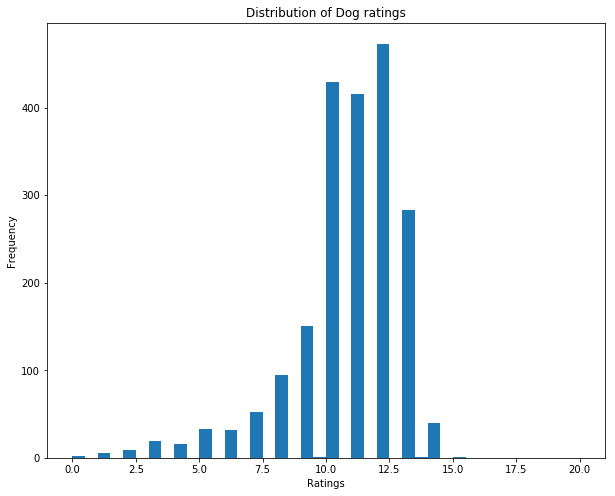

In [80]:
plt.figure(figsize=(10,8))
bin_ratings = np.arange(0, 20 + 0.5, 0.5)
plt.hist(data = archive_copy, x = 'rating_numerator', bins = bin_ratings);
plt.title("Distribution of Dog ratings")
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.savefig('Distribution of Dog Ratings.png')

Most of the dogs have received a rating between **10 - 12.5**.

In [81]:
# Creating a list of top 10 dog breeds (excluding "None"):
top_breeds = archive_copy[archive_copy.p1!="None"].p1.value_counts().head(10)
top_breeds

golden_retriever      150
Labrador_retriever    100
Pembroke               88
Chihuahua              83
pug                    57
Chow-Chow              44
Samoyed                43
Pomeranian             38
Alaskan Malamute       30
cocker_spaniel         30
Name: p1, dtype: int64

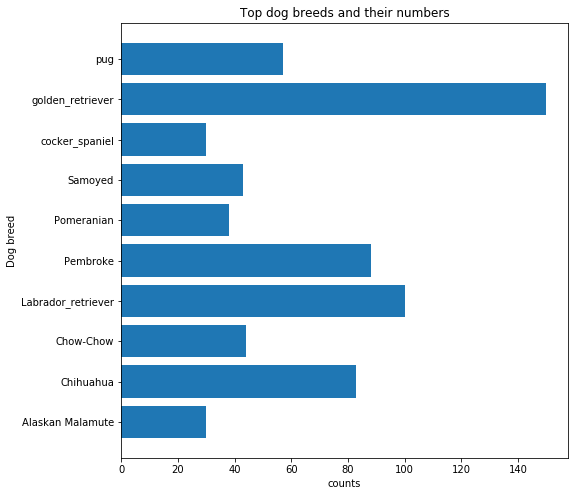

In [82]:
#Plotting the graph
plt.figure(figsize=(8,8))
plt.barh(top_breeds.index, top_breeds);
plt.title("Top dog breeds and their numbers")
plt.xlabel("counts")
plt.ylabel("Dog breed")
plt.savefig('Top dog breeds and their numbers.png')

As we can see from the graph above, the most popular dog breed is **Golden retriever**.

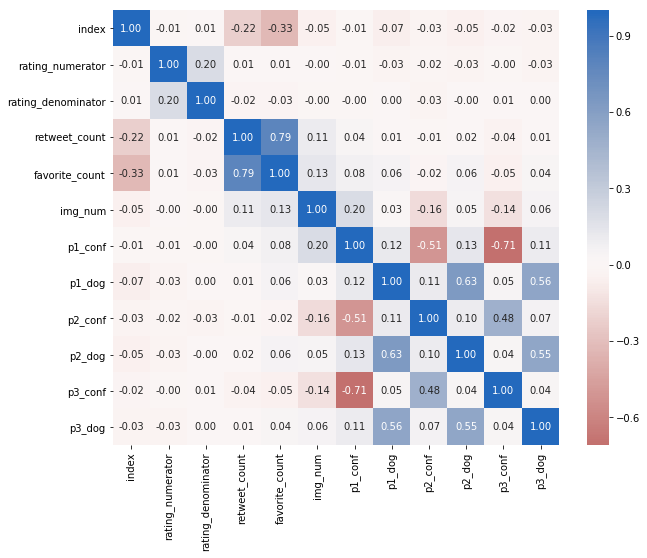

In [83]:
plt.figure(figsize=(10,8))
sns.heatmap(archive_copy.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)
plt.savefig('Correlation.png')

As we can see from the above heat map that there seems to be a strong positive correlation between retweet_count and favorite_count of **0.79**.

In [85]:
#Let us check the top 5 favorite dogs
pd.set_option('display.max_columns', None)
archive_copy.sort_values(by = 'favorite_count', ascending = False).head()


,index,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2068,7282,822872901745569793,2017-01-21 18:26:02,Twitter for iPhone,Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13.0,10.0,None,puppo,48265.0,132810.0,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1,Lakeland_terrier,0.196015,True,Labrador_retriever,0.160329,True,Irish_terrier,0.069126,True
1779,1005,744234799360020481,2016-06-18 18:26:18,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13.0,10.0,None,doggo,79515.0,131075.0,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1,Labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True
199,63,879415818425184262,2017-06-26 19:07:24,Twitter for iPhone,This is Duddles. He did an attempt. 13/10 some...,https://twitter.com/dog_rates/status/879415818...,13.0,10.0,Duddles,None,45849.0,107956.0,https://pbs.twimg.com/ext_tw_video_thumb/87941...,1,English_springer,0.383404,True,Boston_bull,0.134967,True,Cardigan,0.110481,True
1138,2806,807106840509214720,2016-12-09 06:17:20,Twitter for iPhone,This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,13.0,10.0,None,None,56625.0,107015.0,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
2008,4725,866450705531457537,2017-05-22 00:28:40,Twitter for iPhone,This is Jamesy. He gives a kiss to every other...,https://twitter.com/dog_rates/status/866450705...,13.0,10.0,Jamesy,pupper,32883.0,106827.0,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,2,French_bulldog,0.905334,True,Boston_bull,0.078060,True,pug,0.001771,True


In [86]:
#The most favorite dog:
Image(url = 'https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg')

In [87]:
archive_copy.loc[1779].jpg_url

'https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg'

In [88]:
# Rank 2:
Image(url = 'https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg')

In [89]:
archive_copy.loc[199].jpg_url

'https://pbs.twimg.com/ext_tw_video_thumb/879415784908390401/pu/img/cX7XI1TnUsseGET5.jpg'

In [90]:
#Rank 3:
Image(url = 'https://pbs.twimg.com/ext_tw_video_thumb/879415784908390401/pu/img/cX7XI1TnUsseGET5.jpg')

In [91]:
archive_copy.loc[1138].jpg_url

'https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg'

In [92]:
#Rank 4
Image(url = 'https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg' )

In [93]:
archive_copy.loc[2008].jpg_url

'https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg'

In [94]:
Image(url = 'https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg' )

In [95]:
#Let us check the top 5 most retweeted dogs
pd.set_option('display.max_columns', None)
archive_copy.sort_values(by = 'retweet_count', ascending = False).head()


,index,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1779,1005,744234799360020481,2016-06-18 18:26:18,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13.0,10.0,None,doggo,79515.0,131075.0,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1,Labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True
1138,2806,807106840509214720,2016-12-09 06:17:20,Twitter for iPhone,This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,13.0,10.0,None,None,56625.0,107015.0,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1457,2544,842892208864923648,2017-03-18 00:15:37,Twitter for iPhone,RT @dog_rates: This is Stephan. He just wants ...,https://twitter.com/dog_rates/status/807106840...,13.0,10.0,None,None,56625.0,0.0,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1772,1045,739238157791694849,2016-06-04 23:31:25,Twitter for iPhone,Here's a doggo blowing bubbles. It's downright...,https://twitter.com/dog_rates/status/739238157...,13.0,10.0,None,doggo,52360.0,75163.0,https://pbs.twimg.com/ext_tw_video_thumb/73923...,1,Eskimo_dog,0.503372,True,Siberian_husky,0.390413,True,malamute,0.080901,True
2068,7282,822872901745569793,2017-01-21 18:26:02,Twitter for iPhone,Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13.0,10.0,None,puppo,48265.0,132810.0,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1,Lakeland_terrier,0.196015,True,Labrador_retriever,0.160329,True,Irish_terrier,0.069126,True


In [96]:
#Only this one is not in the favorite 5.
archive_copy.loc[1772].jpg_url

'https://pbs.twimg.com/ext_tw_video_thumb/739238016737267712/pu/img/-tLpyiuIzD5zR1et.jpg'

In [97]:
Image(url = 'https://pbs.twimg.com/ext_tw_video_thumb/739238016737267712/pu/img/-tLpyiuIzD5zR1et.jpg' )

##### References :
1. https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html
2. https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id
3. https://video.udacity-data.com/topher/2018/November/5be5fb4c_twitter-api/twitter-api.py
4. https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/